In [13]:
# load packages
import numpy as np
import pandas as pd
# import napari
import tifffile as tf
from skimage import io # import tiff file as ndarray
import os
import matplotlib.pyplot as plt
import seaborn as sns

# import custum colormaps
from colormaps import *

# import custum functions
from STP_plotting import *
from STP_processing import *

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
# universal variables
home_dir = "/mnt/labNAS/"
# home_dir = "/Volumes/Data"

metadata=pd.read_csv('stp_metadata.csv')

# Plot histograms of p05 data

In [6]:
# import p05 images
p05_paths = pd.read_csv(home_dir+"Emily/STP_for_MAPseq/processed_data/file_path.csv", names=["brain", "path"])
means = pd.read_csv(home_dir+"Emily/STP_for_MAPseq/3_brainreg_output/aligned_file_meta.csv", sep=" ")
meta = means.merge(p05_paths,on="brain")


p05_images=[]
for i in range(meta.shape[0]):
    p05_images.append(tf.imread(home_dir+meta.loc[i, 'path']))

Text(0.75, 0.95, 'min: 0\nmax: 14848')

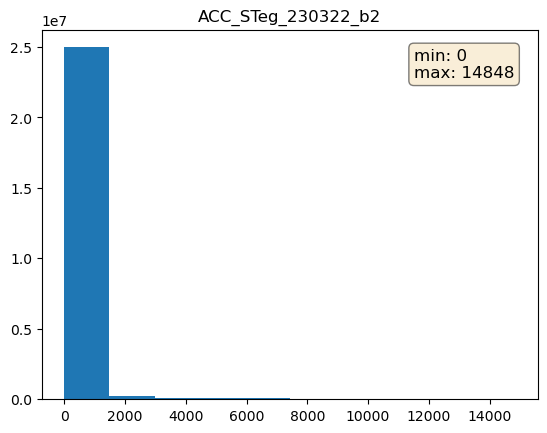

In [34]:
# create histograms
i=3
test = p05_images[3]
min = test.flatten().min()
max = test.flatten().max()
# drop 0s
test_n0 = test[test != 0]

fig, ax = plt.subplots()
ax.hist(test_n0.flatten())
ax.set_xscale('log')
ax.set_title(metadata.loc[i,'brain'])



textstr= "min: "+str(min)+"\nmax: "+str(max)
props=dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.75, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

In [32]:
test_flat = test.flatten()
test_sort = np.sort(test_flat)
test_uniq = np.unique(test_sort)
test_uniq

array([    0,     1,     2, ..., 14707, 14829, 14848], dtype=uint16)

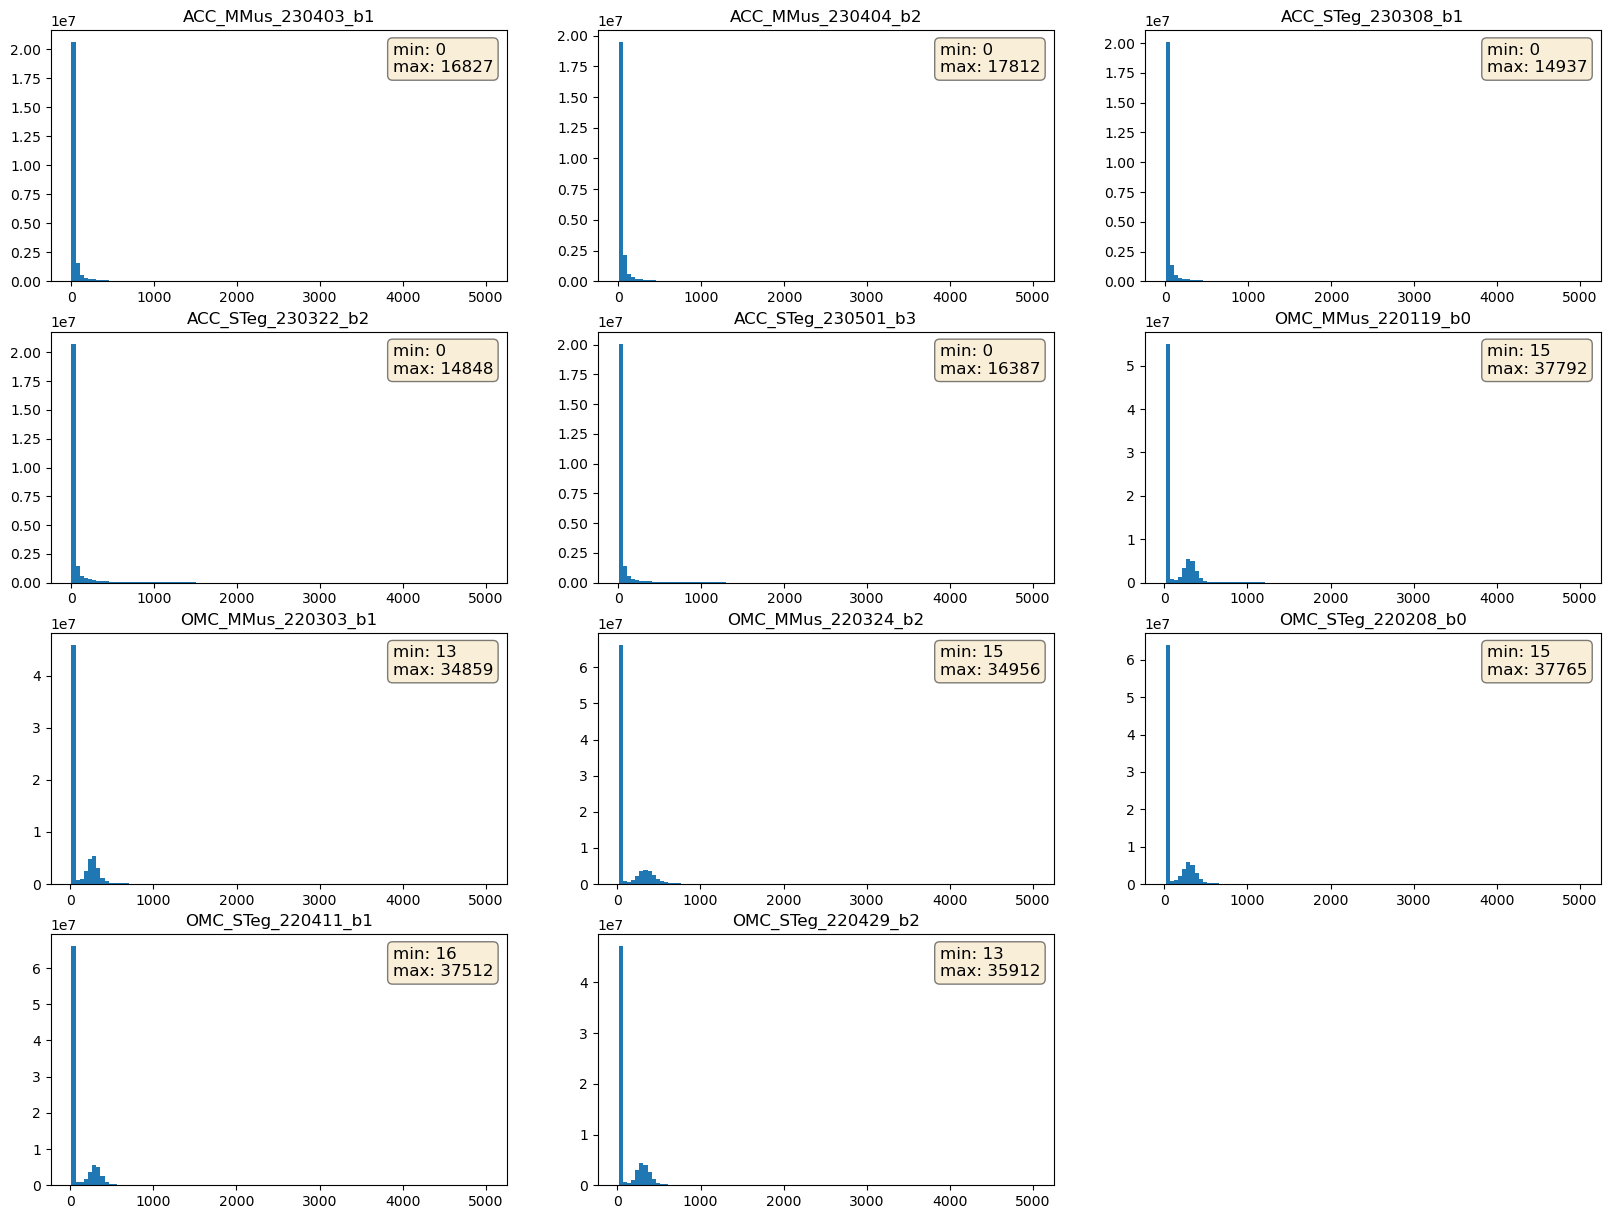

In [38]:
fig, axs = plt.subplots(4,3, figsize=(20,15))

i=0
for ax in axs.flat:
    if i>=metadata.shape[0]:
        ax.axis('off')
    else:
        im = p05_images[i]
        min = im.flatten().min()
        max = im.flatten().max()

        # drop 0s
        im_n0 = im[im!=0]
        # limit range
        im_less = im_n0[im_n0<5000]

        ax.hist(im_less.flatten(), bins=100)
        # ax.set_xscale('log')
        ax.set_title(metadata.loc[i,'brain'])

        

        textstr= "min: "+str(min)+"\nmax: "+str(max)
        props=dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(0.75, 0.95, textstr, transform=ax.transAxes, fontsize=12,
                verticalalignment='top', bbox=props)
    
    i+=1